In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
test = pd.read_table('C:/Users/kosuke/signate/wine/test.tsv')
train = pd.read_table('C:/Users/kosuke/signate/wine/train.tsv',index_col=0)

C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  """Entry point for launching an IPython kernel.
C:\Users\kosuke\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: read_table is deprecated, use read_csv instead, passing sep='\t'.
  


In [3]:
test_i = test.set_index('id')

In [4]:
train.head()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
id,,,,,,,,,,,,,,
0,3,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,2,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
3,1,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
6,1,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
9,1,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [5]:
train.isnull().sum()

Y                               0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [6]:
test.isnull().sum()

id                              0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89 entries, 0 to 177
Data columns (total 14 columns):
Y                               89 non-null int64
Alcohol                         89 non-null float64
Malic acid                      89 non-null float64
Ash                             89 non-null float64
Alcalinity of ash               89 non-null float64
Magnesium                       89 non-null int64
Total phenols                   89 non-null float64
Flavanoids                      89 non-null float64
Nonflavanoid phenols            89 non-null float64
Proanthocyanins                 89 non-null float64
Color intensity                 89 non-null float64
Hue                             89 non-null float64
OD280/OD315 of diluted wines    89 non-null float64
Proline                         89 non-null int64
dtypes: float64(11), int64(3)
memory usage: 10.4 KB


In [8]:
train.describe()

,Y,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,1.955056,12.997079,2.280225,2.387640,19.617978,100.516854,2.319326,2.048315,0.357191,1.592584,5.087303,0.968315,2.604607,745.303371
std,0.767376,0.823056,1.139636,0.305134,3.991086,14.281355,0.579058,1.004159,0.129930,0.616166,2.371440,0.229932,0.695820,318.135777
min,1.000000,11.030000,0.740000,1.360000,10.600000,78.000000,1.300000,0.480000,0.130000,0.410000,1.900000,0.550000,1.290000,312.000000
25%,1.000000,12.370000,1.570000,2.240000,16.800000,89.000000,1.850000,1.250000,0.260000,1.150000,3.270000,0.800000,2.010000,510.000000
50%,2.000000,13.050000,1.780000,2.380000,19.600000,98.000000,2.360000,2.110000,0.340000,1.550000,4.680000,0.980000,2.780000,678.000000
75%,3.000000,13.560000,2.990000,2.610000,22.000000,108.000000,2.800000,2.890000,0.470000,1.980000,6.000000,1.120000,3.160000,920.000000
max,3.000000,14.830000,5.650000,3.230000,30.000000,151.000000,3.850000,5.080000,0.630000,2.960000,13.000000,1.710000,3.920000,1680.000000


In [38]:
cols = train.columns
#平均値
mean = train.mean()
#標準偏差
sigma = train.std()

df = train
#for文で外れ値を除去
for col in cols:
    #3σ法の上下限値を設定
    low = mean[col] - 3 * sigma[col]
    high = mean[col] + 3* sigma[col]
    #条件での絞り込み
    df = df[(df[col] > low) & (df[col] < high)]

In [39]:
X = pd.DataFrame()
X = df.drop(['Y'], 1)
y = df['Y']

In [40]:
X.head()

,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
id,,,,,,,,,,,,,
0,12.36,3.83,2.38,21.0,88,2.30,0.92,0.50,1.04,7.65,0.56,1.58,520
1,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365
3,13.05,1.77,2.10,17.0,107,3.00,3.00,0.28,2.03,5.04,0.88,3.35,885
6,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105
9,13.05,2.05,3.22,25.0,124,2.63,2.68,0.47,1.92,3.58,1.13,3.20,830


In [41]:
y.head()

id
0    3
1    2
3    1
6    1
9    1
Name: Y, dtype: int64

In [42]:
print(X.shape)
print(y.shape)

(84, 13)
(84,)


In [43]:
from yellowbrick.features import JointPlotVisualizer
from yellowbrick.target import ClassBalance

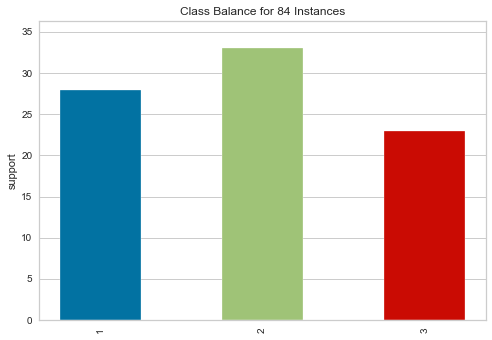

In [44]:
visualizer = ClassBalance()
visualizer.fit(y)
plt.xticks(rotation=90)
visualizer.poof()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

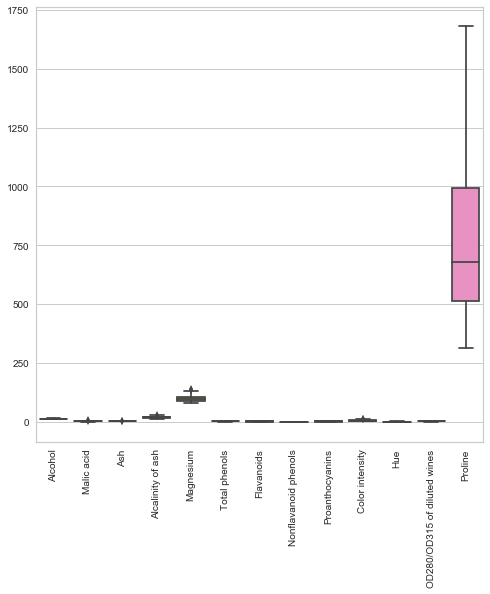

In [45]:
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(8, 8))
sns.boxplot(data=X)
plt.xticks(rotation=90)

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print(X_scaled)

[[-0.87312378  1.31171681 -0.06028088 ... -1.87263392 -1.47611796
  -0.73784922]
 [-0.79590771  1.83577965  1.26229972 ... -0.18726339  0.75253072
  -1.22103988]
 [ 0.01486103 -0.48756561 -1.11834537 ... -0.37452678  1.08538085
   0.39998687]
 ...
 [ 0.32372531 -0.31287799  1.07335963 ...  0.51497433  0.34732187
   1.60017013]
 [ 0.69693632  0.21991923  1.11114765 ... -1.02994866 -1.15773957
  -0.02085662]
 [ 1.52057441  1.4514669   0.43096334 ... -0.32771094  1.34587225
   0.01031697]]


C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 13 Text xticklabel objects>)

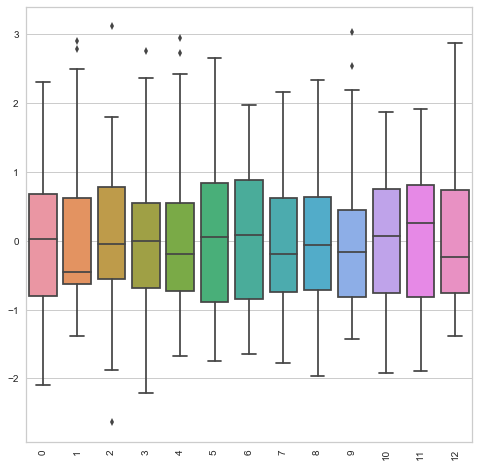

In [48]:
plt.figure(figsize=(8, 8))
sns.boxplot(data=X_scaled)
plt.xticks(rotation=90)

In [49]:
from sklearn.model_selection import train_test_split

In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.3, 
                                                    shuffle=True, random_state=42)

In [51]:
print('X_train：'+ str(X_train.shape) +'X_val：'+ str(X_val.shape) )
print('y_train：'+ str(y_train.shape) +'y_val：'+ str(y_val.shape) )

X_train：(58, 13)X_val：(26, 13)
y_train：(58,)y_val：(26,)


In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [53]:
tuning_parm = [
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']},
    {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']},
    {'C': [1, 10, 100], 'kernel': ['linear']}
]

clf = GridSearchCV(SVC(), tuning_parm, cv=5, scoring='f1_micro', return_train_score=True)

In [54]:
clf.fit(X_train, y_train)

C:\Users\kosuke\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['rbf']}, {'C': [1, 10, 100], 'gamma': [0.1, 0.01, 0.001], 'kernel': ['poly']}, {'C': [1, 10, 100], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='f1_micro', verbose=0)

In [55]:
result_df = pd.DataFrame.from_dict(clf.cv_results_)
result_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.001274,0.000782,0.000719,0.000597,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,0.833333,...,0.931034,0.064434,3,1.000000,1.000000,1.000000,1.000000,0.979167,0.995833,0.008333
1,0.001000,0.001550,0.000923,0.001565,1,0.01,rbf,"{'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}",0.923077,0.833333,...,0.913793,0.052940,4,0.955556,0.978261,0.956522,0.936170,0.979167,0.961135,0.016088
2,0.000841,0.001338,0.000529,0.000673,1,0.001,rbf,"{'C': 1, 'gamma': 0.001, 'kernel': 'rbf'}",0.384615,0.333333,...,0.362069,0.026536,16,0.355556,0.369565,0.369565,0.361702,0.354167,0.362111,0.006594
3,0.001441,0.000386,0.002792,0.001928,10,0.1,rbf,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}",1.000000,0.833333,...,0.948276,0.069252,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.001006,0.001571,0.001454,0.002439,10,0.01,rbf,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}",0.923077,0.833333,...,0.913793,0.052940,4,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


In [56]:
col = ['mean_train_score', 'params']
result_score = result_df[col]
result_score.sort_values(by=['mean_train_score'], ascending=False)

,mean_train_score,params
20,1.000000,"{'C': 100, 'kernel': 'linear'}"
12,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}"
19,1.000000,"{'C': 10, 'kernel': 'linear'}"
3,1.000000,"{'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}"
4,1.000000,"{'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}"
18,1.000000,"{'C': 1, 'kernel': 'linear'}"
6,1.000000,"{'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}"
7,1.000000,"{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}"
15,1.000000,"{'C': 100, 'gamma': 0.1, 'kernel': 'poly'}"
0,0.995833,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}"


In [57]:
clf.best_estimator_

SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [31]:
svm = SVC(C=1,gamma=0.1, kernel = 'rbf')
svm.fit(X_train, y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [32]:
from sklearn.model_selection import cross_val_score

In [33]:
#cross validation
cv_score = cross_val_score(svm, X_scaled, y, cv=5, scoring="f1_micro")
#正解率を出力
pd.DataFrame(cv_score).rename(columns={0: '正解率'})

,正解率
0,1.000000
1,1.000000
2,0.944444
3,1.000000
4,1.000000


In [63]:
test['Y']= svm.predict(test_i)

In [58]:
test[['id', 'Y']].to_csv('./submit1.csv', header=False, index=False)